In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from helper import load_data, write_to_csv, set_sepcial_observation
import DataPreprocessor 
#from handcraft_logistic_regression import LogisticRegression

In [19]:
import importlib
importlib.reload(DataPreprocessor)

<module 'DataPreprocessor' from 'd:\\Coding\\NTU\\110-1\\EEML\\HW2\\DataPreprocessor.py'>

In [20]:
data_path = "./data/"
path_train = os.path.join(data_path, "train.csv")
path_test = os.path.join(data_path, "test.csv")
data_train, data_test = load_data(path_train, path_test)

In [24]:
DP = DataPreprocessor.DataPreprocessor()
X_train, y_train = DP.preprocess_train_data(data_train)
X_test= DP.preprocess_test_data(data_test)

(32561, 103)
(16281, 103)


d:\Coding\NTU\110-1\EEML\HW2\DataPreprocessor.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat["native_country"] = data_cat["native_country"].astype(pd.CategoricalDtype(categories=self.all_native_countries))


In [25]:
print(X_train.shape)
print(X_test.shape)

(32561, 108)
(16281, 108)


# Modeling

# All features
## Numerical
- robust scaling
## Categorical
- one-hot

## KNN


In [26]:
k_max = round(np.sqrt(X_train.shape[0]))
k_range = list(range(20, k_max, 3))
param_grid = {
    "n_neighbors": k_range,
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

In [27]:
KNN = KNeighborsClassifier()
GS = GridSearchCV(KNN, 
    param_grid, 
    verbose = 1,
    cv = 5).fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
GS.score(X_train, y_train)

## K-means

# Selected features
## Numerical
- robust scaling
## Categorical
- one-hot
- remove some features and categories

## KNN

In [66]:
k_max = round(np.sqrt(X_train.shape[0]))
k_range = list(range(20, k_max, 3))
param_grid = {
    "n_neighbors": k_range,
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

In [67]:
KNN = KNeighborsClassifier()
GS = GridSearchCV(KNN, 
    param_grid, 
    verbose = 1,
    cv = 5)

In [68]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed: 15.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [69]:
GS.score(X_train, y_train)

0.8689044088238009

In [72]:
GS.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

param_n_neighbors
25    0.858213
27    0.858175
29    0.858013
31    0.858136
33    0.858167
35    0.858321
37    0.858190
39    0.858121
41    0.858090
43    0.857859
45    0.858313
47    0.858344
49    0.858136
51    0.857959
Name: mean_test_score, dtype: float64


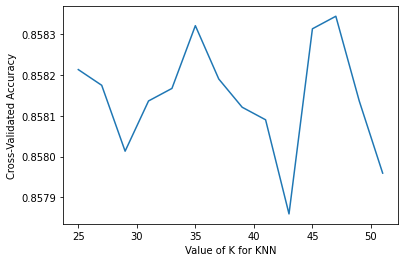

In [73]:
GS_result = pd.DataFrame(GS.cv_results_)
print(GS_result.groupby(["param_n_neighbors"])['mean_test_score'].mean())

k_idx = GS_result.groupby(["param_n_neighbors"])['mean_test_score'].mean().index
acc = GS_result.groupby(["param_n_neighbors"])['mean_test_score'].mean().values

plt.plot(k_idx, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [74]:
y_pred = GS.predict(X_test)
print(f"Before hard labeling, ratio of income >50K = {y_pred.sum() / y_pred.shape[0]}")
y_pred = set_sepcial_observation(y_pred, special_index)
print(f"After hard labeling, ratio of income >50K = {y_pred.sum() / y_pred.shape[0]}")

Before hard labeling, ratio of income >50K = 0.19783797064062403
After hard labeling, ratio of income >50K = 0.1977765493520054


In [ ]:
#記得改名字
file_name = 'submission_1025_3.csv'
write_to_csv(y_pred, file_name)

## K-means